# Análise de Desempenho em partidas de League of Legends

Neste notebook, realizaremos uma análise detalhada dos dados de desempenho de jogadores em partidas de League of Legends. Utilizaremos diversas variáveis que capturam diferentes aspectos do jogo, como desempenho individual, participação em objetivos e interações com o time adversário. O objetivo é testar a acurácia de diferentes modelos preditivos e identificar qual deles apresenta o melhor desempenho para nossas análises.



| Nome da Variável | Tipo | Descrição
|------------------|------|----------|
| baronKills       | int  | Quantidade de barões de nashor feitos |
| bountyLevel      | int  | O nível de recompensa do jogador(quantidade de ouro que ele está valendo) |
| champLevel       | int  | O nível do campeão |
| championName     | str  | O nome do campeão  |
| consumablesPurchased | int | A quantidade de itens consumíveis comprados |
| damageDealtToObjectives | int | O total de dano dado em objetivos |
| damageSelfMitigated | int | O total de dano auto-mitigado de inimigos |
| dragonKills | int | Quantidade de dragões feitos |
| firstBloodAssist | bool | Se o jogador teve participação na primeira kill do jogo |
| firstTowerAssist | bool | Se o jogador teve participação na primeira torre derrubada no jogo |
| goldSpent | int | Total de ouro gasto durante a partida
| individualPosition | str | A posição na qual o jogador jogou |
| inhibitorTakedowns | int | Quantidade de inibidores derrubados |
| inhibitorsLost | int | Quantidade de inibidores perdidos |
| item0 | str | Nome do Item 0 |
| item1 | str | Nome do Item 1 |
| item2 | str | Nome do Item 2 |
| item3 | str | Nome do Item 3 |
| item4 | str | Nome do Item 4 |
| item5 | str | Nome do Item 5 |
| item6 | str | Nome do Item 6 |
| longestTimeSpentLiving | int | Maior quantidade de tempo sem morrer |
| magicDamageDealtToChampions | int | Total de dano mágico causado |
| objectivesStolenAssists | int | Quantidade de participações em objetivos roubados |
| physicalDamageDealtToChampions | int | Dano físico causado em outros jogadores |
| spell1Casts | int | Quantidade que a skill "Q" foi utilizada |
| spell2Casts | int | Quantidade que a skill "W" foi utilizada |
| spell3Casts | int | Quantidade que a skill "E" foi utilizada |
| spell4Casts | int | Quantidade que a skill "R" foi utilizada |
| summoner1Casts | int | Quantidade que a skill "D" foi utilizada |
| summoner2Casts | int | Quantidade que a skill "F" foi utilizada |
| summoner1Id | str | Feitiço de invocador 1 |
| summoner2Id | str | Feitiço de invocador 2 |
| teamId | int | O lado do mapa que o jogador jogou |
| timeCCingOthers | int | Tempo de atordoamento causado à jogadores inimigos |
| timePlayed | int | Tempo de partida |
| totalDamageDealtToChampions | int | Dano total causado |
| totalDamageTaken |int | Dano total sofrido |
| totalHeal | int | Cura total recebida |
| totalHealsOnTeammates | int | Cura total dada ao time aliado |
| totalTimeSpentDead | int | Tempo passado morto |
| trueDamageDealtToChampions | int | Total de dano verdadeiro causado |
| turretTakedowns | int | Quantidade de torres derrubadas |
| turretsLost | int | Quantidade de torres perdidas |
| visionScore | int | Score de visão |
| win | bool | Se a partida foi vencida ou não |
| allPings | int | Quantidade de pings feitos |
| participations | int | Quantidade de participações em abates |
| totalFarm | int | Quantidade de farm |

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform, randint
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_excel("content/MATCHS.xlsx", index_col=[0])

In [ ]:
df.head()

,baronKills,bountyLevel,champLevel,championName,consumablesPurchased,damageDealtToObjectives,damageSelfMitigated,deaths,dragonKills,firstBloodAssist,...,totalHealsOnTeammates,totalTimeSpentDead,trueDamageDealtToChampions,turretTakedowns,turretsLost,visionScore,win,allPings,participations,totalFarm
0,0,0,14,Fiora,2,980,16253,6,0,False,...,1029,140,3415,0,9,19,False,30,6,175
1,0,0,15,Volibear,5,25655,28308,4,1,False,...,0,102,1296,6,2,27,True,11,13,184
2,0,1,15,Yasuo,1,12196,21453,3,0,False,...,0,97,0,7,1,11,True,32,7,220
3,0,1,13,Camille,2,0,22121,5,0,False,...,0,148,3517,0,11,14,False,20,8,164
4,0,2,14,Fiora,1,9801,24503,5,0,False,...,2074,144,5003,5,2,14,True,8,4,204


In [ ]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [ ]:
dum = pd.get_dummies(df).sample(30000)

In [ ]:
X = dum.drop('win', axis=1)
y = dum['win']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_all = scaler.fit_transform(X)

# Escolhendo o melhor modelo para nosso objetivo

Iremos treinar 6 modelos diferentes e escolher o modelo com a melhor acurácia na base de testes. Depois vamos utilizar um Random Search para encontrar os melhores hiperparâmetros para o modelo escolhido.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

In [ ]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Melhor modelo: {best_model_name} com acurácia de {results[best_model_name]}")

Melhor modelo: Gradient Boosting com acurácia de 0.9705


In [ ]:
results

{'Logistic Regression': 0.9578333333333333,
 'KNN': 0.5753333333333334,
 'Decision Tree': 0.9505,
 'Random Forest': 0.9606666666666667,
 'Gradient Boosting': 0.9705,
 'Neural Network': 0.9495}

#### O melhor modelo testado foi o Gradient Boosting. Agora iremos utilizar um Random Search para encontrar os melhores hiperparâmetros para nosso modelo

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.5, 1.0),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
best_params = random_search.best_params_
best_score = random_search.best_score_

#### Os melhores parâmetros para a construção do nosso modelo de Regressão são os parâmetros abaixo.

In [ ]:
best_params

{'learning_rate': 0.21889128185193651,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 18,
 'n_estimators': 130,
 'subsample': 0.766781014275285}

#### Agora iremos escolher o melhor número de componentes para o nossa redução de dimensionalidade




In [ ]:
dum = pd.get_dummies(df)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(dum.drop(columns='win'))

In [ ]:
pca = PCA()
pca.fit(scaled)

PCA()

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
for n_components, explained_variance in enumerate(cumulative_variance, start=1):
    if explained_variance >= 0.95:
        print(f"{n_components} componentes capturam {explained_variance:.2%} da variância.")
        break

1394 componentes capturam 95.05% da variância.


#### Escolhendo o melhor Scaler

In [ ]:
X = pd.get_dummies(df.drop(columns='win'))
y= df['win']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = GradientBoostingClassifier(
  learning_rate= 0.21889128185193651,
  max_depth= 5,
  max_features= 1.0,
  min_samples_leaf= 5,
  min_samples_split= 18,
  n_estimators= 130,
  subsample= 0.766781014275285
)

In [ ]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

In [ ]:
results = {}
for scaler_name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])

    # Validar o desempenho usando validação cruzada
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    results[scaler_name] = scores.mean()


In [ ]:
for scaler_name, score in results.items():
    print(f"{scaler_name}: {score:.4f}")

StandardScaler: 0.9760
MinMaxScaler: 0.9761
RobustScaler: 0.9761


#### Detecção e remoção de outliers e overfitting

In [5]:
X = pd.get_dummies(df.drop(columns='win'))
y = df['win']

In [ ]:
model = GradientBoostingClassifier(
  learning_rate= 0.21889128185193651,
  max_depth= 5,
  max_features= 1.0,
  min_samples_leaf= 5,
  min_samples_split= 18,
  n_estimators= 130,
  subsample= 0.766781014275285
)

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, cv=5)

In [ ]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

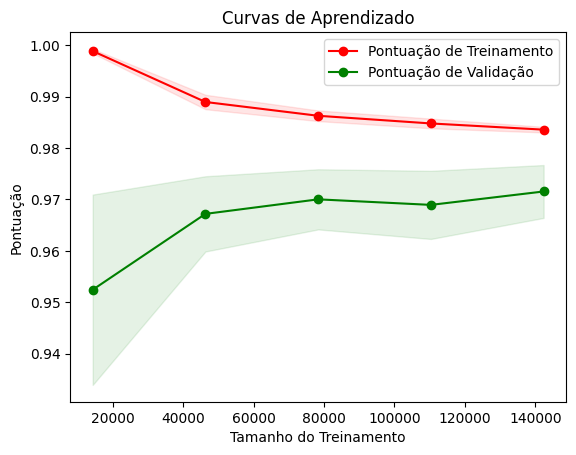

In [ ]:
plt.figure()
plt.title('Curvas de Aprendizado')
plt.xlabel('Tamanho do Treinamento')
plt.ylabel('Pontuação')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1,
                 color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Pontuação de Treinamento')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='g',
         label='Pontuação de Validação')

plt.legend(loc='best')
plt.show()

#### Não foi encontrado nenhuma ocorrência de overfitting no nosso modelo.

In [6]:
X = sm.add_constant(X)

In [7]:
boolean_columns = X.select_dtypes(include='bool').columns
X[boolean_columns] = X[boolean_columns].astype(int)

In [8]:
modelo = sm.OLS(y, X).fit()

In [9]:
residuos = modelo.resid
residuos_padronizados = modelo.get_influence().resid_studentized_internal
residuos_studentizados = modelo.get_influence().resid_studentized_external

c:\Users\shady\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


MemoryError: Unable to allocate 2.11 GiB for an array with shape (1592, 177967) and data type float64

In [ ]:
distancia_cook = modelo.get_influence().cooks_distance[0]
leverage = modelo.get_influence().hat_matrix_diag

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(modelo.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Ajustados')
plt.show()

In [ ]:
sm.qqplot(residuos, line ='45')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(distancia_cook)), distancia_cook, markerfmt=",")
plt.xlabel('Índice')
plt.ylabel('Distância de Cook')
plt.title('Distância de Cook para cada observação')
plt.show()

In [ ]:
outliers = np.where((np.abs(residuos_studentizados) > 3) | (distancia_cook > 1) | (leverage > 2*(len(X.columns)/len(y))))
print("Outliers detectados nos índices:", outliers)

#### Escolhemos qual modelo e scaler utilizar e os melhores hiperparâmetros, agora iremos montar nosso Pipeline

In [10]:
class DenseTransformer(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

In [13]:
df = pd.read_excel("content/MATCHS.xlsx")

In [14]:
X = df.drop(columns='win')
y = df['win']

In [15]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [19]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', DenseTransformer()),
    ('pca', PCA(n_components=1394)),
    ('classifier', GradientBoostingClassifier(
        learning_rate= 0.21889128185193651,
        max_depth= 5,
        max_features= 1.0,
        min_samples_leaf= 5,
        min_samples_split= 18,
        n_estimators= 130,
        subsample= 0.766781014275285
    )
  )
])

In [20]:
pipeline.fit(X_train, y_train)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
report

In [ ]:
accuracy